In [22]:
import utils
import pandas as pd
import datetime as dt
import pprint
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import tree, model_selection


df = pd.read_csv("Sessionized_SquarePanda.csv", error_bad_lines=False)
df


,childid,session_id,createdat,gamename,duration,gender,age,wordtype,platform,gamescore,minutes_since_last_interval,new_event_boundary
0,1004,0,2016-11-07 20:34:00,Lagoon,47,F,19,WORD,Not Known,1,NaN,0
1,1005,0,2016-11-07 20:52:00,Lagoon,7,F,7,WORD,Not Known,1,NaN,0
2,1005,0,2016-11-07 20:53:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
3,1005,0,2016-11-07 20:54:00,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
4,1010,0,2016-11-08 00:45:00,Bubbles,70,F,4,WORD,Not Known,1,NaN,0
5,1010,1,2016-11-10 00:07:00,Bubbles,23,F,4,WORD,Not Known,0,2842.0,1
6,1010,2,2016-11-12 12:40:00,Bubbles,78,F,4,WORD,Not Known,1,3633.0,1
7,1010,2,2016-11-12 12:52:00,Bubbles,294,F,4,WORD,Not Known,1,12.0,0
8,1010,3,2016-11-17 00:14:00,Bowling,48,F,4,WORD,Not Known,1,6442.0,1
9,1010,3,2016-11-17 00:15:00,Bowling,55,F,4,WORD,Not Known,1,1.0,0


In [23]:
df_1 = df.groupby(df['childid']).first()
df_2 = df.groupby(df['childid']).last()

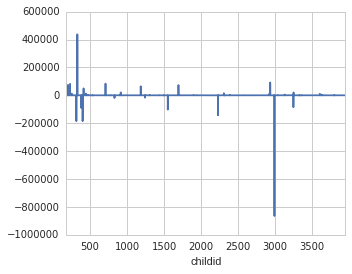

In [24]:
x = df_1.index
Initial_Duration = df_1['duration']
Latest_Duration = df_2['duration']
(Initial_Duration-Latest_Duration).plot()
plt.show()


In [25]:

df_1['createdat'] = pd.to_datetime(df_1['createdat'])
df_2['createdat'] = pd.to_datetime(df_2['createdat'])

In [26]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

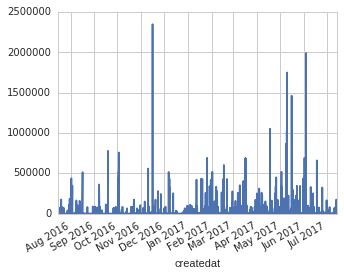

In [27]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

df = pd.read_csv("Sessionized_SquarePanda.csv", index_col='createdat',parse_dates=True,error_bad_lines=False)
df.head()
df['duration'].plot()
plt.show()

In [28]:
df.head()

,childid,session_id,gamename,duration,gender,age,wordtype,platform,gamescore,minutes_since_last_interval,new_event_boundary
createdat,,,,,,,,,,,
2016-11-07 20:34:00,1004,0,Lagoon,47,F,19,WORD,Not Known,1,NaN,0
2016-11-07 20:52:00,1005,0,Lagoon,7,F,7,WORD,Not Known,1,NaN,0
2016-11-07 20:53:00,1005,0,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
2016-11-07 20:54:00,1005,0,Lagoon,0,F,7,WORD,Not Known,1,1.0,0
2016-11-08 00:45:00,1010,0,Bubbles,70,F,4,WORD,Not Known,1,NaN,0


In [29]:

df['dateofactivity'] = pd.to_datetime(df.index).date
x = df.groupby(['childid'])['dateofactivity'].first()
y = df.groupby(['childid'])['dateofactivity'].last()
(y-x).mean()

Timedelta('58 days 07:25:54.098360')

# Average lifetime of a user activity is 58 days i.e. approximately 2 months

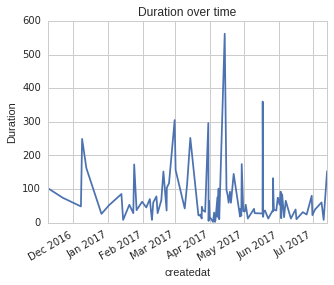

In [30]:
df2 = df.sample(n=100,random_state=25,axis=0)
plt.xlabel('Create Date')
plt.ylabel('Duration')
plt.title('Duration over time')
df2['duration'].plot()

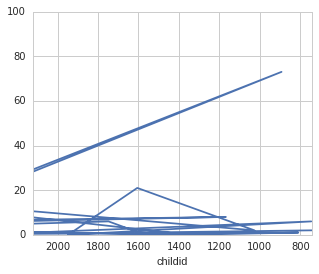

In [31]:
df3 = df.groupby(['childid'])['session_id'].last()
df4 = df3.sample(n=25,random_state=25,axis=0)
plt.ylim(0,100)
df4.plot()

In [32]:
df['dateofactivity'] = df.index.date

df.head()

,childid,session_id,gamename,duration,gender,age,wordtype,platform,gamescore,minutes_since_last_interval,new_event_boundary,dateofactivity
createdat,,,,,,,,,,,,
2016-11-07 20:34:00,1004,0,Lagoon,47,F,19,WORD,Not Known,1,NaN,0,2016-11-07
2016-11-07 20:52:00,1005,0,Lagoon,7,F,7,WORD,Not Known,1,NaN,0,2016-11-07
2016-11-07 20:53:00,1005,0,Lagoon,0,F,7,WORD,Not Known,1,1.0,0,2016-11-07
2016-11-07 20:54:00,1005,0,Lagoon,0,F,7,WORD,Not Known,1,1.0,0,2016-11-07
2016-11-08 00:45:00,1010,0,Bubbles,70,F,4,WORD,Not Known,1,NaN,0,2016-11-08


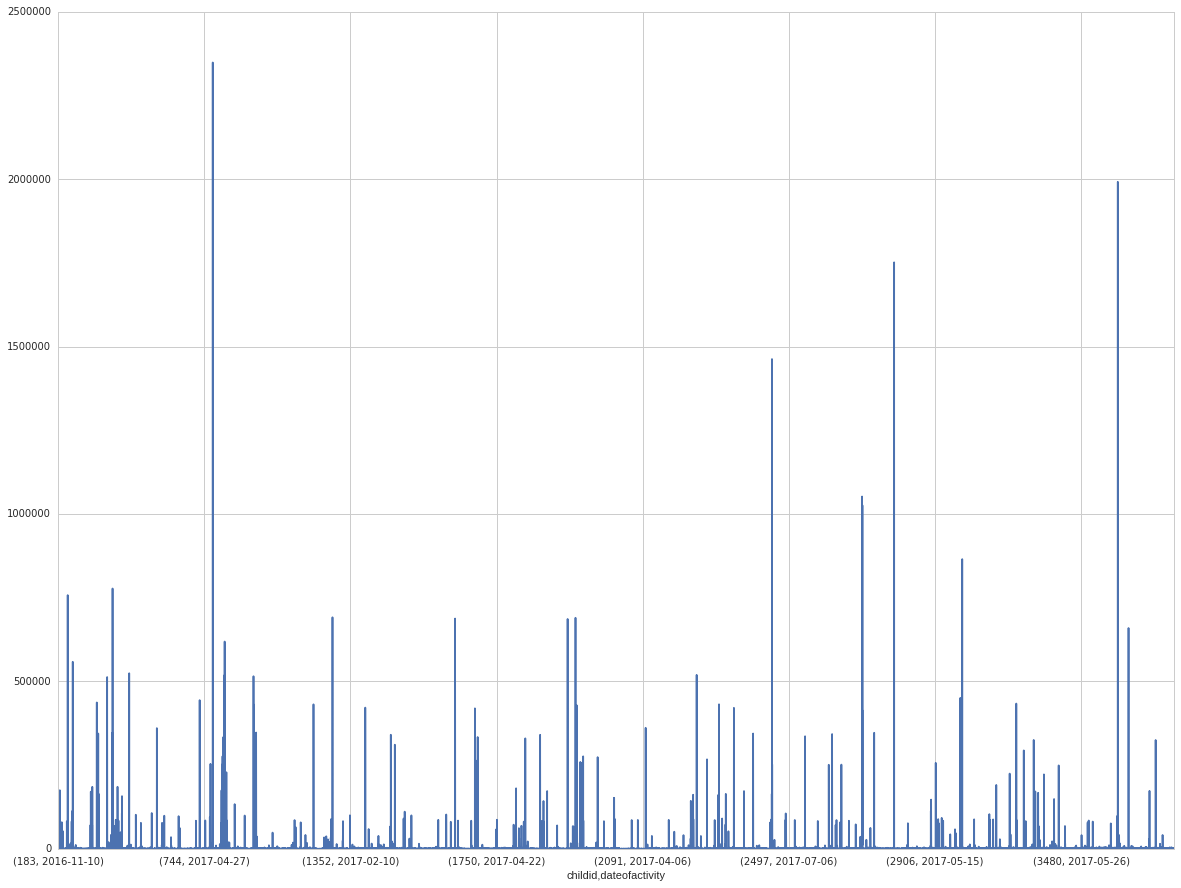

In [33]:
df_5 = df.groupby(['childid','dateofactivity'])['duration'].sum()
df_5.plot(x='dateofactivity',y='duration',figsize=(20,15))

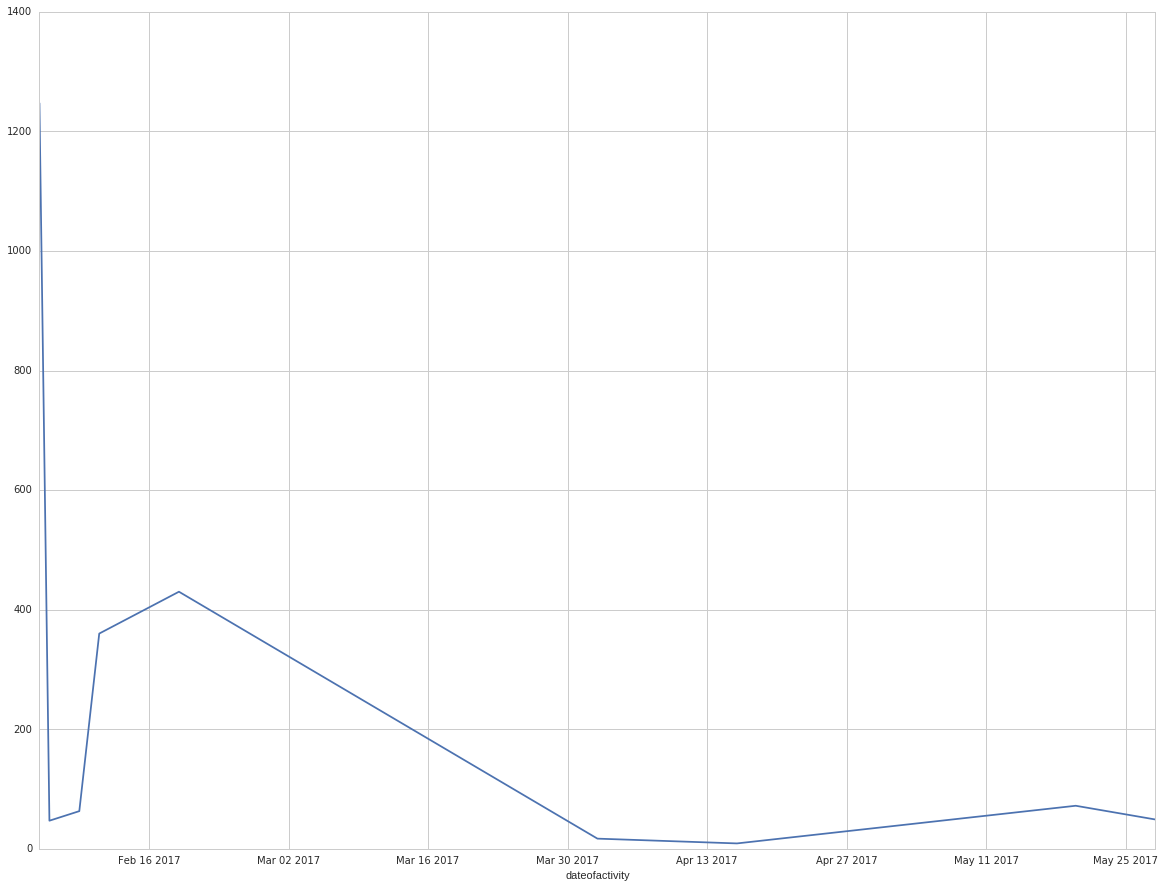

In [45]:
df_6 = df.loc[df['childid'] == 1980]
df_6 = df_6.groupby(['dateofactivity'])['duration'].sum()
df_6.plot(x='dateofactivity',y='duration',figsize=(20,15))



## General analogy for the trend of duration for all users is they start at a lower pace experience an high in their playing duration and again come to a low

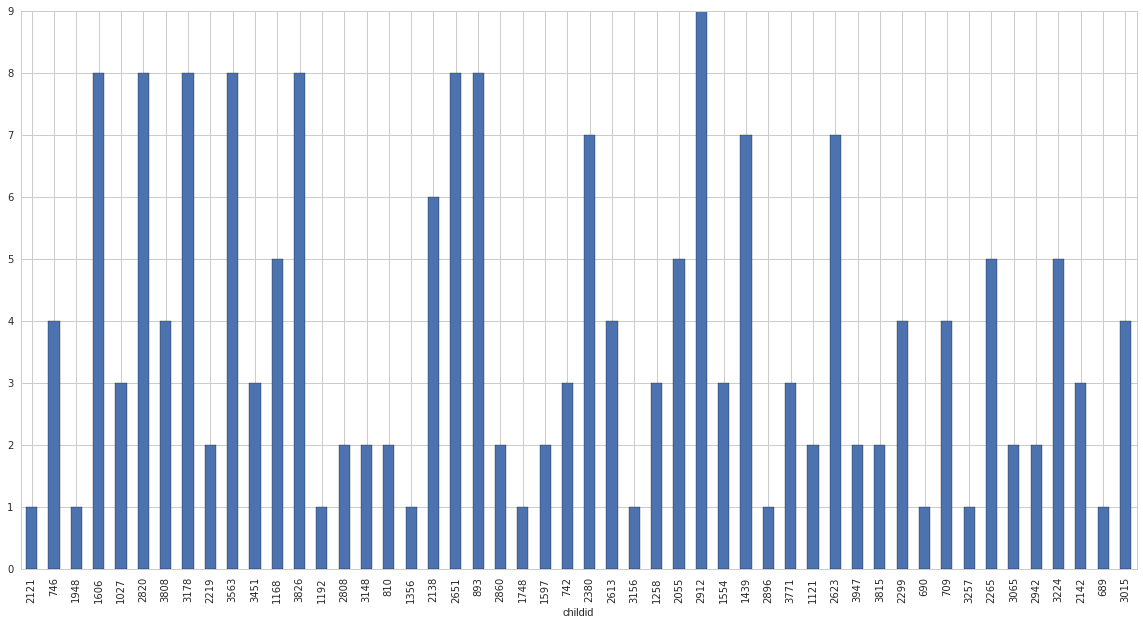

In [17]:
df.groupby(['childid'])['gamename'].nunique().sample(n=50,random_state=25,axis=0).plot(kind='bar',figsize=(20,10))

childid  session_id
183      0                0
         1             -329
         2             -195
         3              -47
188      0                0
         1                0
         2             -473
189      0                0
         1             -388
         2                0
191      0              -55
         1                0
         2             -486
         3              -82
         4             -682
193      0                0
         1                0
         2              -29
         3             -245
         4                0
194      0                0
196      0                0
         1                0
         2                0
         3                0
197      0                0
         1                0
198      0                0
         1                0
         2             -104
                       ... 
3923     0             -462
3924     0            -1472
3925     0             -171
3927     0             -682


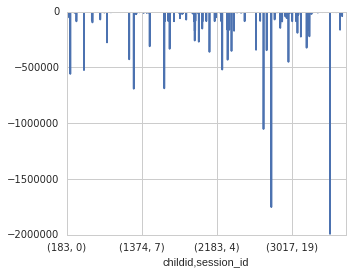

In [18]:

x = df.groupby(['childid','session_id'])['gamename','duration'].sum()
y = df.groupby(['childid','session_id'])['gamename','duration'].first()
z = y-x
print z['duration']
print z['duration'].plot()
#print z



# As the difference of duration of first game played by a child in one session and total duration of all games played by that child in the same session is -ve always, implies that every child spends more time playing other games than the one he started with in that session

## (The other games may contain the same game the child started as his first game in the same session)

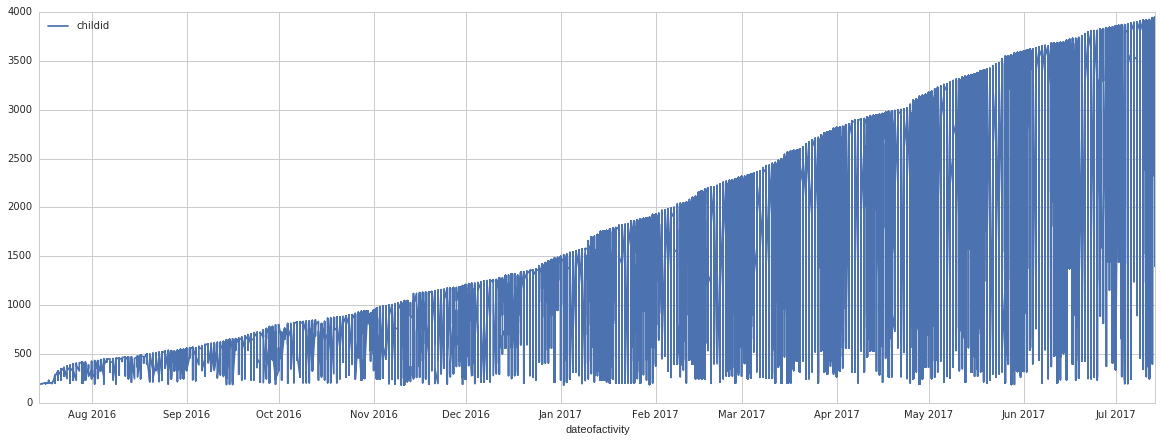

In [19]:
df.plot(x='dateofactivity',y='childid',figsize=(20,7))

## Hence childid increases in chronological order